# Assignment 2


Describing the problem

Setting up details importing libraries etc...

In [1]:
import random
import csv
import matplotlib.pyplot
import requests
import codecs
import ipywidgets as widgets

In [2]:
random.seed(1)

In [3]:
n_particles = 5000
bomb_location = []

In [4]:
#This line silences a warning linked to the certificate of the original URL
requests.packages.urllib3.disable_warnings(
    requests.packages.urllib3.exceptions.InsecureRequestWarning)
res = requests.get("https://www.geog.leeds.ac.uk/courses/\
computing/study/core-python-phd/assessment2/wind.raster", verify = False)


In [5]:
lines_iterator = res.iter_lines()
# create a CSV reader object and encode the content using the codecs module
data = csv.reader(codecs.iterdecode(lines_iterator, encoding="utf-8"), delimiter=",")
# loop through the rows on the "data" list
for index, row in enumerate(data):
    # Initialise the rowist
            rowlist = []
            # Loop for the values
            for value in row:
                rowlist.append(int(value))
            bomb_location.append(rowlist)

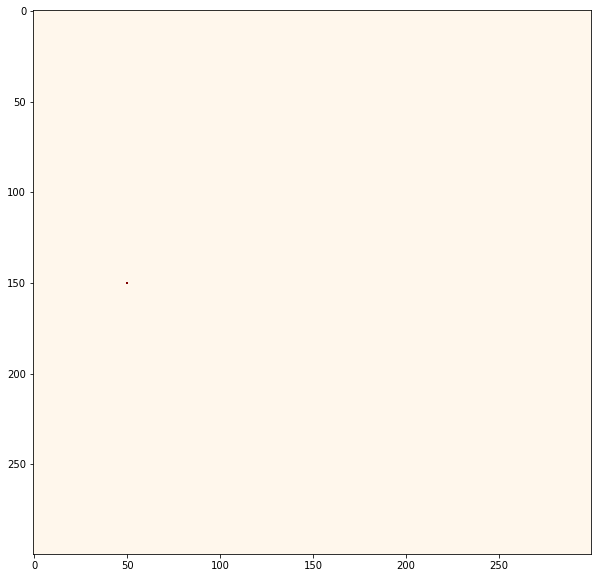

In [6]:
matplotlib.pyplot.figure(figsize = (10,10))
matplotlib.pyplot.imshow(bomb_location, cmap='OrRd', aspect='auto')

In [7]:
for i, row in enumerate(bomb_location):
    for j, value in enumerate(row):
        if (value==255):
            x0=j
            y0=i
print(x0, y0)

50 150


## Defining the particle class
### Particles properties
position in x, y, z.

In [8]:
class Particle():
    def __init__ (self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    @property
    def x (self):
        return (self._x)
    
    @property
    def y (self):
        return (self._y)
    
    @property
    def z (self):
        return (self._z)
    
    @x.setter
    def x (self,n):
        self._x=n
      
    @y.setter
    def y (self,n):
        self._y=n
        
    @z.setter
    def z (self,n):
        self._z=n
    
   

### Defining the move methods
#### Sampling numbers from an uniform distribution

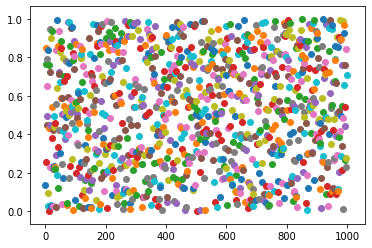

In [9]:
for i in range(1000):
    matplotlib.pyplot.scatter(i,random.uniform(0,1))

#### Movement methods

Probabilities are defined for the movement to East, West, South and North (in that order) in a list.

In [10]:
def move(Particle, prob2D = [0.05,0.75,0.1,0.1]):
    randxy = random.uniform(0,1)
    #print("xy",randxy)
    randz = random.uniform(0,1)
    #print("z",randz)

    #Planar/horizonal movement
    if randxy <= sum(prob2D[0:1]):
        Particle.x = Particle.x - 1 # Move to the East
    if sum(prob2D[0:1]) < randxy <= sum(prob2D[0:2]):
        Particle.x = Particle.x + 1 # Move to the West
    if  sum(prob2D[0:2]) < randxy <= sum(prob2D[0:3]):
        Particle.y = Particle.y - 1 # Move to the South
    if sum(prob2D[0:3]) < randxy <= sum(prob2D[0:4]):
        Particle.y = Particle.y + 1 # Move to the North

    # Vertical movement
    if randz <= 0.2:
        Particle.z = Particle.z + 1 # Move up
    if 0.2 < randz <= 0.90:
        Particle.z = Particle.z - 1 # Move down

In [11]:
particle1=Particle(x=20,y=50,z=30)
print(particle1.x,particle1.y,particle1.z)
move(particle1)
print(particle1.x,particle1.y,particle1.z)

20 50 30
21 50 31


## Movement of a single particle to the ground
### Particle in t0



In [12]:
particle = Particle(x = x0, y = y0, z = 300)


### Control 
While statement condition

In [13]:
while particle.z>0 :
    move(particle)
    # print(particle.x,particle.y,particle.z)

print(particle.x,particle.y,particle.z)

426 157 0


### Boundaries

In [14]:
while particle.z>0 :
    particle.move()
    if not(particle.x in range(len(ground[0]))) or not(particle.y in range(len(ground))):
        break

## Movement of all particles
### Ground object definition


In [15]:
def clear_ground():
    ground=[]
    for i in range(len(bomb_location)):
        tmp_row = []
        for j in range(len(bomb_location[0])):
            tmp_row.append(0)
        ground.append(tmp_row)
    return(ground)

myground = clear_ground()

In [16]:
### For loop for each particle

In [17]:
for i in range(n_particles):
    particle = Particle(x = x0, y = y0, z = 75)
    
    while particle.z>0 :
        move(particle)
        if not(particle.x in range(len(myground[0])-1)) or not(particle.y in range(len(myground)-1)):
            break
      
    if particle.z==0:
        myground[particle.y][particle.x] += 1

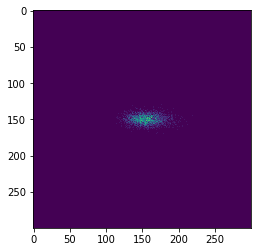

In [18]:
matplotlib.pyplot.imshow(myground)

In [19]:
part_slider = widgets.IntSlider(value=5000, min=1, max=10000, step=1, description='Particles (N):', readout=True)
h_slider = widgets.IntSlider(value=75, min=1, max=100, step=1, description='Height (m):', readout=True)

W_widget = widgets.FloatSlider(min=0.0, max=1, step=0.05, value=0.05,description='Probability W:')
E_widget = widgets.FloatSlider(min=0.0, max=1, step=0.05, value=0.75,description='Probability E:')
N_widget = widgets.FloatSlider(min=0.0, max=1, step=0.05, value=0.10,description='Probability N:')
S_widget = widgets.FloatSlider(min=0.0, max=1, step=0.05, value=0.10,description='Probability S:')

def normProbs():
    # Normalise the values of the probabilities
    total = (W_widget.value+E_widget.value+N_widget.value+S_widget.value)
    W_widget.value = W_widget.value/total
    E_widget.value = E_widget.value/total
    N_widget.value = N_widget.value/total
    S_widget.value = S_widget.value/total

    
def run(n_particles,height,Ew,Ww,Nw,Sw):
    #Update values in sliders before using them
    normProbs()
    
    # Prepare Probability list for move method
    probabilities = [W_widget.value,E_widget.value,N_widget.value,S_widget.value]
    
    # Clean the ground raster
    myground = clear_ground()

    # Run main loop
    for i in range(n_particles):
        particle = Particle(x = x0, y = y0, z = height)

        while particle.z>0 :
            move(particle,probabilities)
            if not(particle.x in range(len(myground[0])-1)) or not(particle.y in range(len(myground)-1)):
                break

        if particle.z==0:
            myground[particle.y][particle.x] += 1

    # Visualisation
    matplotlib.pyplot.figure(figsize = (10,10))
    matplotlib.pyplot.imshow(myground, cmap='Oranges') 
    matplotlib.pyplot.scatter(x0, y0, s = 50, c = 'black', marker = "+") # Drop point


    
# Set up for the UI with slides and links values to values for functions run
widgets.interact_manual(run,
                        n_particles = part_slider,
                        height = h_slider,
                        Ew = E_widget, Ww = W_widget, Nw = N_widget, Sw = S_widget
                       )

interactive(children=(IntSlider(value=5000, description='Particles (N):', max=10000, min=1), IntSlider(value=7…

<function __main__.run(n_particles, height, Ew, Ww, Nw, Sw)>